# 1.分段多项式绘图
### 代码：

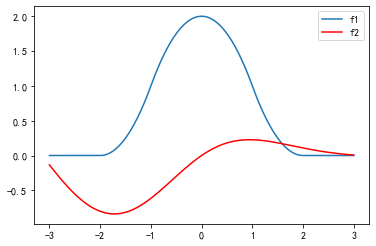

In [1]:
import matplotlib.pyplot as plt
import numpy as np  
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
def fenduan(x):
    if abs(x)>=2:
        return 0
    elif abs(x)<=1:
        return 2-x**2
    elif x>=1 and x<=2:
        return (x-2)**2
    elif x>=-2 and x<=-1:
        return (x+2)**2
plt.figure()
X = np.linspace(-3,3,600)
Y1 = np.array([fenduan(t) for t in X])
plt.plot(X,Y1,label='f1')
Y2 = np.sin(X)/(np.exp(X)+1)
plt.plot(X,Y2,color='red',label='f2')
plt.legend(loc='best')
plt.show()

# 2.三次样条插值
### 代码：

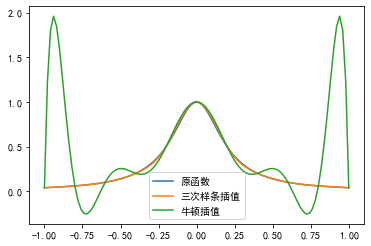

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
from scipy.interpolate import CubicSpline

#牛顿插值多项式
def Newpoly(X, Y):
    n = len(X)
    D = np.zeros([n, n], dtype=np.double)
    D[:, 0] = Y
    for j in range(1, n):
        for k in range(j, n):
            D[k, j] = (D[k, j - 1] - D[k - 1, j - 1]) / (X[k] - X[k - j])   
    C = D[n - 1, n - 1]
    for k in range(n - 2, -1, -1):
        C = np.convolve(C, np.poly([X[k]]))
        m = len(C) - 1
        C[m] = C[m] + D[k, k]
    return C, D
x = np.linspace(-1,1,11)
y = 1/(1+25*x**2)
cs=CubicSpline(x,y,bc_type='not-a-knot')
C, D = Newpoly(x,y)
ans = np.poly1d(C)
X = np.linspace(-1,1,101)
Y = 1/(1+25*X**2)
plt.figure()
plt.plot(X,Y,label='原函数')
plt.plot(X,cs(X),label='三次样条插值')
plt.plot(X,ans(X),label='牛顿插值')
plt.legend(loc='best')
plt.show()

# 3.埃尔米特插值
### 代码：

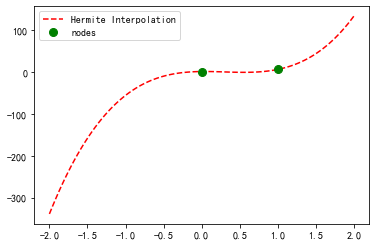

对原问题进行埃尔米特插值后多项式在0.75处的值为：
0.109375


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
import numpy as np
from scipy.interpolate import KroghInterpolator
x=np.linspace(-2,2,100)
xi=np.array([0,0,1,1])
yi=np.array([1,2,6,37])
interpolant=KroghInterpolator(xi,yi)
plt.figure()
plt.plot(x,interpolant(x),'r--',label='Hermite Interpolation')
plt.plot([0,1],[1,6],'go',label='nodes',markersize=8)
plt.legend(loc='best')
plt.show()
print("对原问题进行埃尔米特插值后多项式在0.75处的值为：")
print(interpolant(0.75))